<h1 align='center'>Getting started with Tensorflow and Object detection</h1>

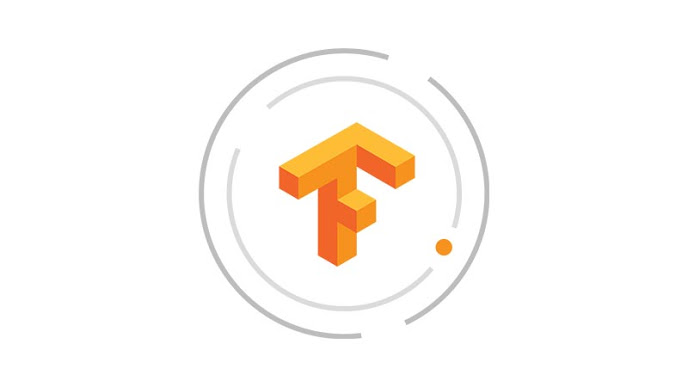

# Table of Contents

1. <a href='#1'>What is Tensorflow?</a>
2. <a href='#2'>Why Tensorflow?</a>
2. <a href='#3'>Installing Tensorflow</a>
2. <a href='#4'>Basics of Tensorflow</a>
4. <a href='#5'>Data flow programming</a>
5. <a href='#6'>TensorBoard: Visualizing Learning</a>
6. <a href='#7'></a>
7. <a href='#8'></a>
9. <a href='#10'>TensorBoard</a>
9. <a href='#11'>Tensor Playground</a>
8. <a href='#9'>Object detection using Tensorflow</a>
15. <a href='#0'>References</a>

<a id='1'></a>
# What is Tensorflow?

* TensorFlow™ is an open source software library for high performance numerical computation. 
* Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. 
* Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.

* TensorFlow, at its heart, is a library for dataflow programming. It leverages various optimization techniques to make the calculation of mathematical expressions easier and more performant.


* Some of the key features of TensorFlow are:

    * Efficiently works with mathematical expressions involving multi-dimensional arrays
    * Good support of deep neural networks and machine learning concepts
    * GPU/CPU computing where the same code can be executed on both architectures
    * High scalability of computation across machines and huge data sets


* Together, these features make TensorFlow the perfect framework for machine intelligence at a production scale.

<a id='2'></a>
# Why Tensorflow?

* TensorFlow is an up and coming library that is backed by Google and that is quickly spawning very interesting projects. 
* While it’s great to have access to pre-trained models with APIs such as those offered by Clarifai and Google, it’s important, as you progress in machine learning, to be able to dig deeper and train your own data locally. 
* In addition, it’s important to find a community of programmers, data scientists, and mathematicians who are able to gather together around a project to create a vibrant ecosystem.


* A group that is particularly interesting to me is the one creating the Magenta project, powered by TensorFlow. 
* <a href="https://magenta.tensorflow.org/">Magenta</a> is a library that is using machine learning to create compelling art and music. 
* <a href="https://magenta.tensorflow.org/assets/sketch_rnn_demo/index.html">Try drawing with a machine:</a>

<img src='https://developer.telerik.com/wp-content/uploads/2017/09/magenta-tensorflow-1.gif'>

* Or, listen to music generated by Magenta. If you think decent music can’t be machine generated, think again – the <a href='http://www.aiva.ai/'>samples</a> on this web site are quite moving – composed by machines and performed by humans.

<a id='3'></a>
# Installing Tensorflow

* Now that you know more about TensorFlow, it’s time to get started and install the library. 
* Here, it’s good to know that TensorFlow provides APIs for Python, C++, Haskell, Java, Go, Rust.
* It’s best to check the <a href='https://www.tensorflow.org/install/'>official installation instructions</a>.

* For installing using Python pip, use the command:
        # pip install tensorflow

* Now that you have gone through the installation process, it’s time to double check that you have installed TensorFlow correctly by importing it into your workspace under the alias tf:

In [1]:
import tensorflow as tf

In [2]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


* If the system outputs the following, then you are ready to begin writing TensorFlow programs:
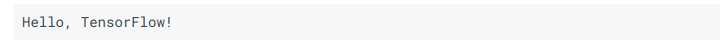

* If the system outputs an error message instead of a greeting, see <a href='https://www.tensorflow.org/install/install_linux#common_installation_problems'>Common installation problems</a>.

<a id='4'></a>
# Basics of Tensorflow

* First, import the tensorflow library under the alias tf, as you have seen in the previous section. 
* Then initialize two variables that are actually constants. Pass an array of four numbers to the constant() function.

In [3]:
# Import `tensorflow`
import tensorflow as tf

* Note that you could potentially also pass in an integer, but that more often than not, you’ll find yourself working with arrays. 
* As tensors are all about arrays! So make sure that you pass in an array
* Next, you can use multiply() to multiply your two variables. 
* Store the result in the result variable. Lastly, print out the result with the help of the print() function.

In [4]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

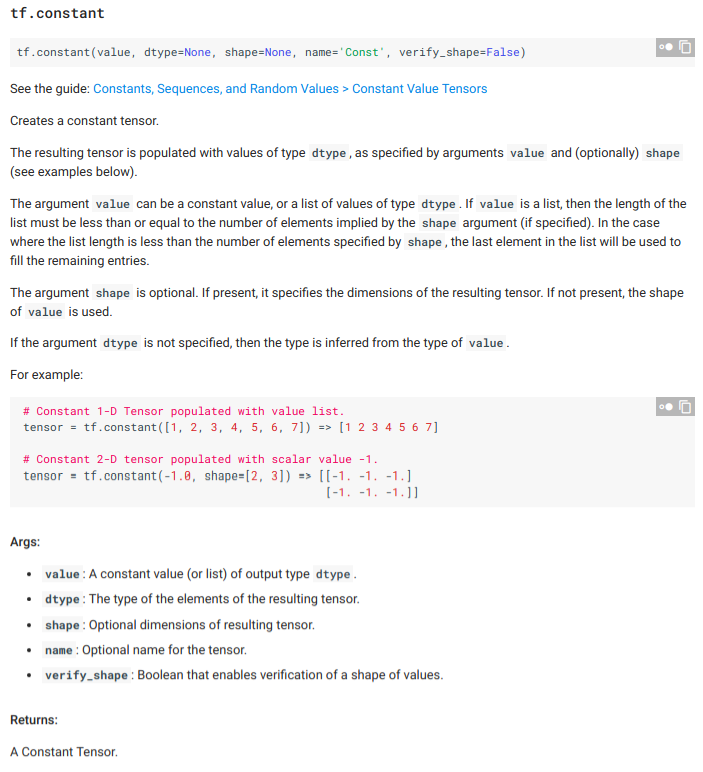

In [5]:
# Multiply
result = tf.multiply(x1, x2)

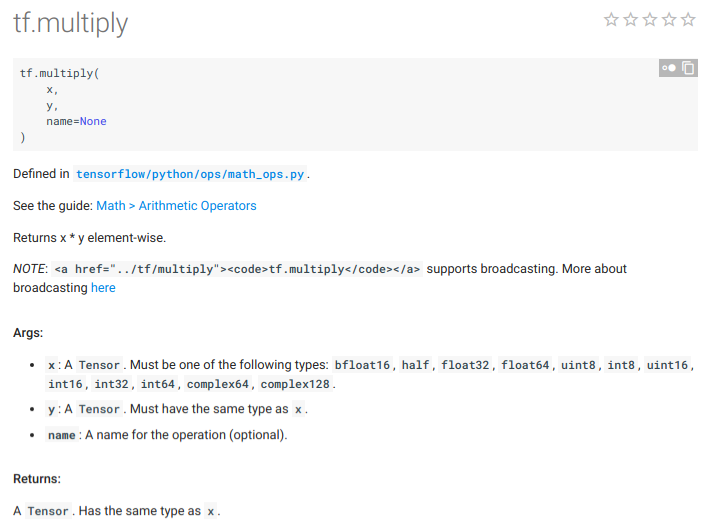

In [6]:
# Print the result
print(result)

Tensor("Mul:0", shape=(4,), dtype=int32)


* Note that you have defined constants in the code above. 
* However, there are two other types of values that you can potentially use, namely placeholders, which are values that are unassigned and that will be initialized by the session when you run it.
* Like the name already gave away, it’s just a placeholder for a tensor that will always be fed when the session is run.
* There are also Variables, which are values that can change. 
* The constants, as you might have already gathered, are values that don’t change.

* The result of the lines of code is an abstract tensor in the computation graph.
* However, contrary to what you might expect, the result doesn’t actually get calculated.
* It just defined the model but no process ran to calculate the result. 
* You can see this in the print-out: there’s not really a result that you want to see.
* This means that TensorFlow has a **Lazy evaluation**

* However, if you do want to see the result, you have to run this code in an interactive session.
* You can do this in a few ways

In [7]:
# Intialize the Session
sess = tf.Session()

In [8]:
# Print the result
print(sess.run(result))

[ 5 12 21 32]


In [9]:
# Close the session
sess.close()

* Note that you can also use the following lines of code to start up an interactive Session, run the result and close the Session automatically again after printing the output:

In [10]:
# Import `tensorflow`
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Initialize Session and run `result`
with tf.Session() as sess:
  output = sess.run(result)
  print(output)

[ 5 12 21 32]


<a id='5'></a>
# Data flow programming

* TensorFlow uses a dataflow graph to represent your computation in terms of the dependencies between individual operations. 
* This leads to a low-level programming model in which you first define the dataflow graph, then create a TensorFlow session to run parts of the graph across a set of local and remote devices.

* Each node of the graph represents an instance of a mathematical operation (like addition, division, or multiplication) and each edge is a multi-dimensional data set (tensor) on which the operations are performed.

## Why Data flow graphs?

<img src='https://www.tensorflow.org/images/tensors_flowing.gif'>

* Dataflow is a common programming model for parallel computing. In a dataflow graph, the nodes represent units of computation, and the edges represent the data consumed or produced by a computation. 
* For example, in a TensorFlow graph, the tf.matmul operation would correspond to a single node with two incoming edges (the matrices to be multiplied) and one outgoing edge (the result of the multiplication).

* Dataflow has several advantages that TensorFlow leverages when executing your programs:

    * **Parallelism**. By using explicit edges to represent dependencies between operations, it is easy for the system to identify operations that can execute in parallel.

    * **Distributed execution**. By using explicit edges to represent the values that flow between operations, it is possible for TensorFlow to partition your program across multiple devices (CPUs, GPUs, and TPUs) attached to different machines. TensorFlow inserts the necessary communication and coordination between devices.

    * **Compilation**. TensorFlow's XLA compiler can use the information in your dataflow graph to generate faster code, for example, by fusing together adjacent operations.

    * **Portability**. The dataflow graph is a language-independent representation of the code in your model. You can build a dataflow graph in Python, store it in a SavedModel, and restore it in a C++ program for low-latency inference.

## Simple Expressions

* Let’s start with simple expressions and assume that, for some reason, we want to evaluate the function y = 5*x + 13 in TensorFlow fashion.

* In simple Python code, it would look like:

In [11]:
x = -2.0
y = 5*x + 13
print (y)

3.0


* which gives us in this case a result of 3.0.

* Now we will convert the above expression into TensorFlow terms.

In [12]:
x = tf.constant(-2.0, name="x", dtype=tf.float32)
a = tf.constant(5.0, name="a", dtype=tf.float32)
b = tf.constant(13.0, name="b", dtype=tf.float32)

In [13]:
y = tf.Variable(tf.add(tf.multiply(a, x), b))

* Variables in TensorFlow are in-memory buffers containing tensors which have to be explicitly initialized and used in-graph to maintain state across session. 
* By simply calling the constructor the variable is added in computational graph.


* Variables are especially useful once you start with training models, and they are used to hold and update parameters.
* An initial value passed as an argument of a constructor represents a tensor or object which can be converted or returned as a tensor. 
* That means if we want to fill a variable with some predefined or random values to be used afterwards in the training process and updated over iterations.

In [14]:
init = tf.global_variables_initializer()

In [15]:
with tf.Session() as session:
  session.run(init)
  print (session.run(y))

3.0


## Sessions
* In order to actually evaluate the nodes, we must run a computational graph within a session.

* A session encapsulates the control and state of the TensorFlow runtime.
* A session without parameters will use the default graph created in the current session, otherwise the session class accepts a graph parameter, which is used in that session to be executed.

## Using TensorFlow: Defining Computational Graphs

* The good thing about working with dataflow graphs is that the execution model is separated from its execution (on CPU, GPU, or some combination) where, once implemented, software in TensorFlow can be used on the CPU or GPU where all complexity related to code execution is hidden.

* The computation graph can be built in the process of using the TensorFlow library without having to explicitly instantiate Graph objects.

* A Graph object in TensorFlow can be created as a result of a simple line of code like c = tf.add(a, b). 
* This will create an operation node that takes two tensors a and b that produce their sum c as output.

* The computation graph is a built-in process that uses the library without needing to call the graph object directly.
* A graph object in TensorFlow, which contains a set of operations and tensors as units of data, is used between operations which allows the same process and contains more than one graph where each graph will be assigned to a different session. 
* For example, the simple line of code **c=tf.add(a,b)** will create an operation node that takes two tensors a and b as input and produces their sum c as output.

* TensorFlow also provides a feed mechanism for patching a tensor to any operation in the graph, where the feed replaces the output of an operation with the tensor value. 
* The feed data are passed as an argument in the run() function call.

* A placeholder is TensorFlow’s way of allowing developers to inject data into the computation graph through placeholders which are bound inside some expressions.
* The signature of the placeholder is:
    **placeholder(dtype, shape=None, name=None)**

* where dtype is the type of elements in the tensors and can provide both the shape of the tensors to be fed and the name for the operation.

* If the shape isn’t passed, this tensor can be fed with any shape.
* An important note is that the placeholder tensor has to be fed with data, otherwise, upon execution of the session and if that part is missing, the placeholder generates an error with the following structure: **InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'y' with dtype float**

* The advantage of placeholders is that they allow developers to create operations, and the computational graph in general, without needing to provide the data in advance for that, and the data can be added in runtime from external sources.

* Let’s take a simple problem of multiplying two integers x and y in TensorFlow fashion, where a placeholder will be used together with a feed mechanism through the session run method.

In [16]:
x = tf.placeholder(tf.float32, name="x")
y = tf.placeholder(tf.float32, name="y")

z = tf.multiply(x, y, name="z")

with tf.Session() as session:
    print (session.run(z, feed_dict={x: 2.1, y: 3.0}))

6.2999997


<a id='6'></a>
# TensorBoard: Visualizing Learning

* TensorBoard is a visualization tool for analyzing data flow graphs. 
* This can be useful for gaining better understanding of machine learning models.

* With TensorBoard, you can gain insight into different types of statistics about the parameters and details about the parts of the computational graph in general. 
* It is not unusual that a deep neural network has large number of nodes. 
* TensorBoard allows developers to get insight into each node and how the computation is executed over the TensorFlow runtime.

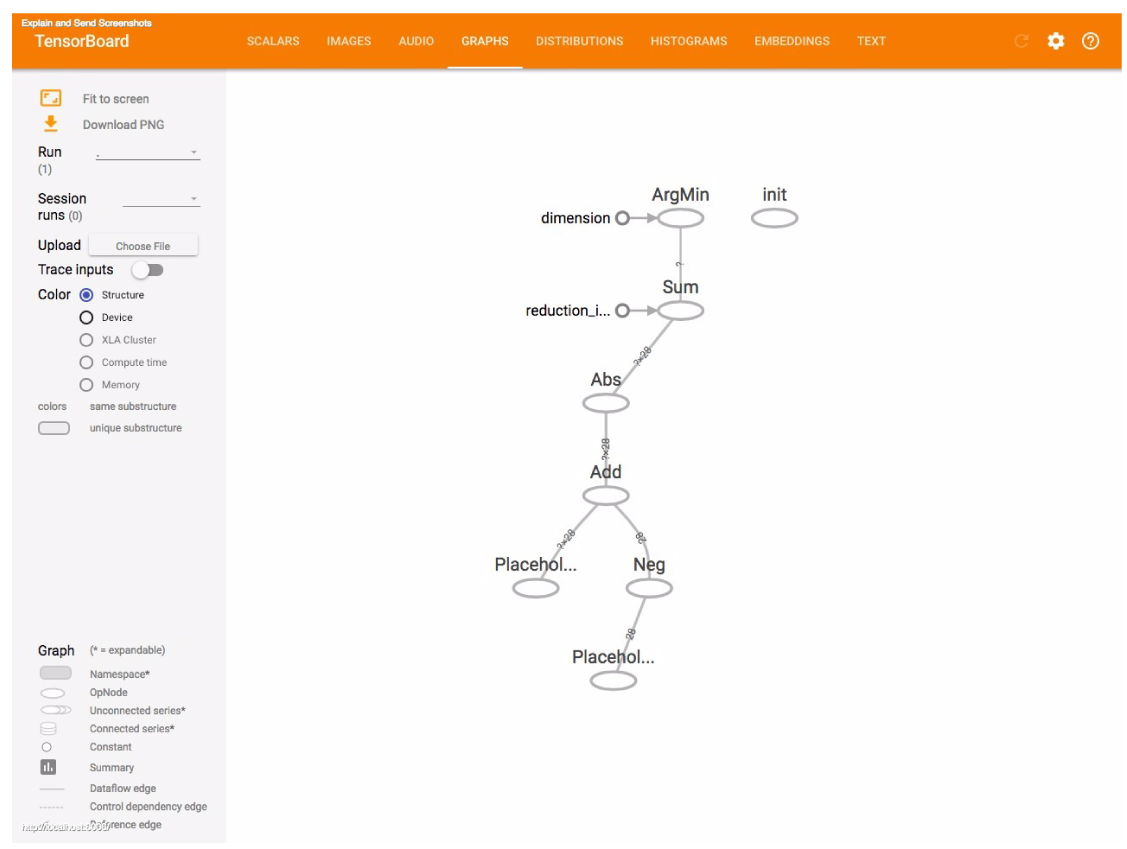

* Now let’s get back to our example from the beginning of this TensorFlow tutorial where we defined a linear function with the format y = a*x + b.

* In order to log events from session which later can be used in TensorBoard, TensorFlow provides the FileWriter class. 
* It can be used to create an event file for storing summaries and events where the constructor accepts six parameters and looks like: **__init__(logdir, graph=None, max_queue=10, flush_secs=120, graph_def=None, filename_suffix=None)**

* where the logdir parameter is required, and others have default values. 
* The graph parameter will be passed from the session object created in the training program. 
* The full example code looks like:

In [24]:
import tensorflow as tf

x = tf.constant(-2.0, name="x", dtype=tf.float32)
a = tf.constant(5.0, name="a", dtype=tf.float32)
b = tf.constant(13.0, name="b", dtype=tf.float32)

y = tf.Variable(tf.add(tf.multiply(a, x), b))

init = tf.global_variables_initializer()

with tf.Session() as session:
    writer = tf.summary.FileWriter("logs", session.graph)

    session.run(init)
    print (session.run(y))

3.0


* We added just one new line. 
* FileWriteris used to dump events to the file as we described above, respectively.

* After running the program, we have the file in the directory logs, and the last step is to run tensorboard: **tensorboard --logdir logs/**

* Now TensorBoard is started and running on the default port 6006. 
* After opening https://localhost:6006 and clicking on the Graphs menu item (located at the top of the page), you will be able to see the graph, like the one in the picture below:

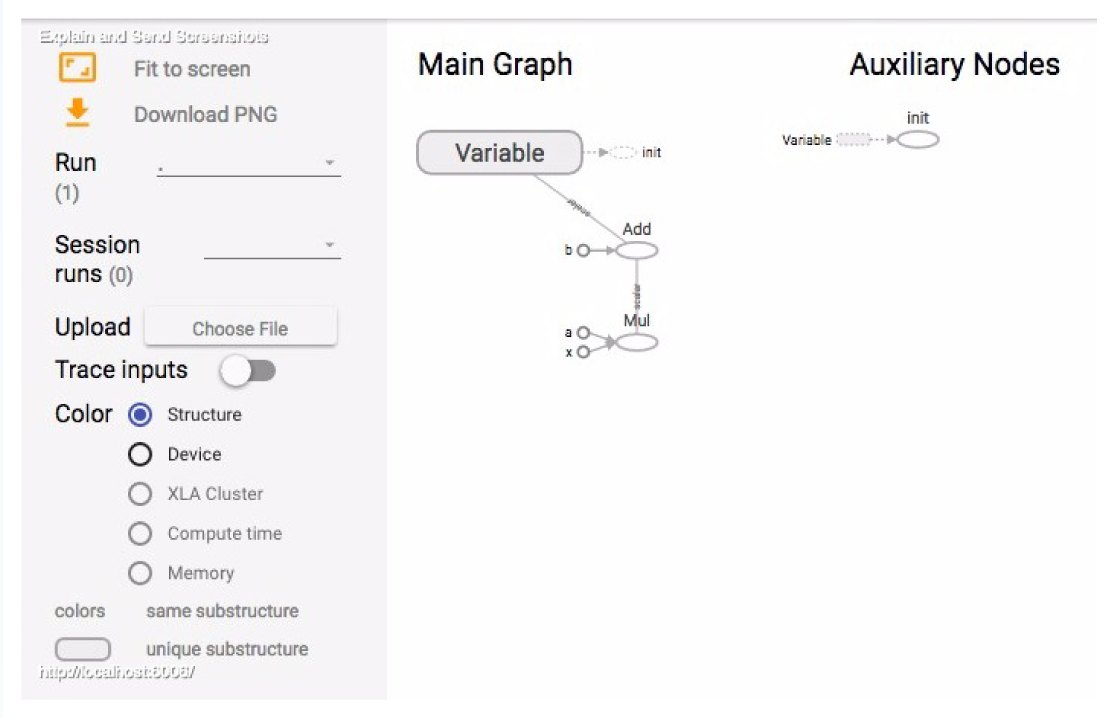

* TensorBoard marks constants and summary nodes specific symbols, which are described below.

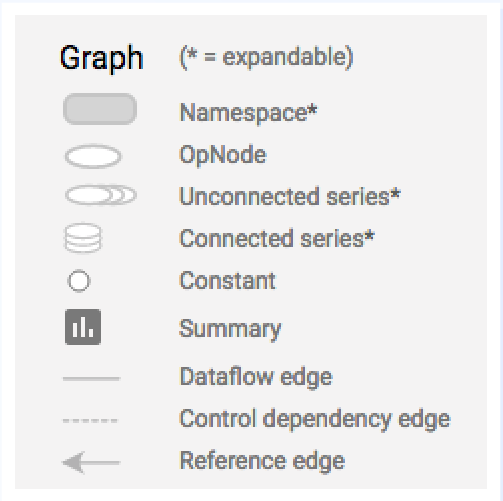

<a id=''></a>
# Machine Learning Problem with TensorFlow

* In this section, we will present a machine learning use case with TensorFlow. The example will be a linear regression algorithm.

* The linear regression algorithm looks for a linear relationship between two variables. 
* If we label the dependent variable as y, and the independent variable as x, then we’re trying to estimate the parameters of the function y = Wx + b.

* Linear regression is a widely used algorithm in the field of applied sciences. 
* This algorithm allows adding in implementation two important concepts of machine learning: Cost function and the gradient descent method for finding the minimum of the function.

* A machine learning algorithm that is implemented using this method must predict values of y as a function of x where a linear regression algorithm will determinate values W and b, which are actually unknowns and which are determined across training process. 
* A cost function is chosen, and usually the mean square error is used where the gradient descent is the optimization algorithm used to find a local minimum of the cost function.

* The gradient descent method is only a local function minimum, but it can be used in the search for a global minimum by randomly choosing a new start point once it has found a local minimum and repeating this process many times. 
* If the number of minima of the function is limited and there are very high number of attempts, then there is a good chance that at some point the global minimum is spotted.
* See Some more details about this technique in the previous meetup files.

In [22]:
import tensorflow as tf
import numpy as np

test_data_size = 2000
iterations = 10000
learn_rate = 0.005

def generate_test_values():
    train_x = []
    train_y = []

    for _ in range(test_data_size):
        x1 = np.random.rand()
        x2 = np.random.rand()
        x3 = np.random.rand()
        y_f = 2 * x1 + 3 * x2 + 7 * x3 + 4
        train_x.append([x1, x2, x3])
        train_y.append(y_f)

    return np.array(train_x), np.transpose([train_y])

x = tf.placeholder(tf.float32, [None, 3], name="x")
W = tf.Variable(tf.zeros([3, 1]), name="W")
b = tf.Variable(tf.zeros([1]), name="b")
y = tf.placeholder(tf.float32, [None, 1])

model = tf.add(tf.matmul(x, W), b)

cost = tf.reduce_mean(tf.square(y - model))
train = tf.train.GradientDescentOptimizer(learn_rate).minimize(cost)

train_dataset, train_values = generate_test_values()

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
#     merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("logs", session.graph)
    for _ in range(iterations):
        session.run(train, feed_dict={
            x: train_dataset,
            y: train_values
        })

    print ("cost = {}".format(session.run(cost, feed_dict={
        x: train_dataset,
        y: train_values
    })))

    print ("W = {}".format(session.run(W)))
    print ("b = {}".format(session.run(b)))

cost = 2.487122947059106e-05
W = [[1.990399 ]
 [2.9894462]
 [6.9903393]]
b = [4.015704]


* In the above example, we have two new variables, which we called cost and train. 
* With those two variables, we defined an optimizer which we want to use in our training model and the function which we want to minimize.

* At the end, the output parameters of W and b should be identical as those defined in the generate_test_values function. 
* In line 17, we actually defined a function which we used to generate the linear data points to train where w1=2, w2=3, w3=7 and b=4. 
* Linear regression from the above example is multivariate where more than one independent variable are used.

<a id='11'></a>
# Tensor Playground

* The <a href='https://playground.tensorflow.org/'>TensorFlow playground</a> can be used to illustrate that deep learning uses multiple layers of abstraction.
* TensorFlow Playground is an interactive web app that allows users to test artificial intelligence (AI) algorithms with Google’s TensorFlow machine learning libraries.


* TensorFlow Playground allows users who are unfamiliar with high-level math and coding to experiment with neural networks for deep learning and other machine learning applications.
* Neural network operations are interactive and are represented visually in the Playground.


* The TensorFlow Playground web app is built on Typescript using d3.js. 
* Through the browser, the user can run small neural networks, create experiments and get results.
* The included open source library is designed to meet educational requirements. 
* Although small, the library is fast, flexible, scalable and ready to use for learning, research and production. Google also provides training and exercises to help users learn more about neural networks and machine learning.

<a id=''></a>
# Object Detection using Tensorflow

* Welcome to the object detection inference walkthrough!  This section will walk you step by step through the process of using a pre-trained model to detect objects in an image. 
* Make sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md) before you start.
* And also clone this <a href='https://github.com/tensorflow/models'>repo</a>, in the directory where the current notebook is. 

# Imports

In [1]:
import os
home_path = os.getcwd()

In [2]:
from distutils.version import StrictVersion
import numpy as np
import six.moves.urllib as urllib
import sys
# import tarfile
import tensorflow as tf
# import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

os.chdir( home_path + '/models/research/' )
# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')


## Env setup

In [3]:
# This is needed to display the images.
%matplotlib inline

## Object detection imports
Here are the imports from the object detection module.

In [20]:
os.chdir(home_path + '/models/research/object_detection/')
from utils import label_map_util
from utils import visualization_utils as vis_util

# Model preparation 

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_FROZEN_GRAPH` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [6]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

## Load a (frozen) Tensorflow model into memory.

In [7]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [9]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {'id': 34, 'name'

## Helper code

In [14]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [15]:
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [16]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [17]:
def detect(image_path):
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

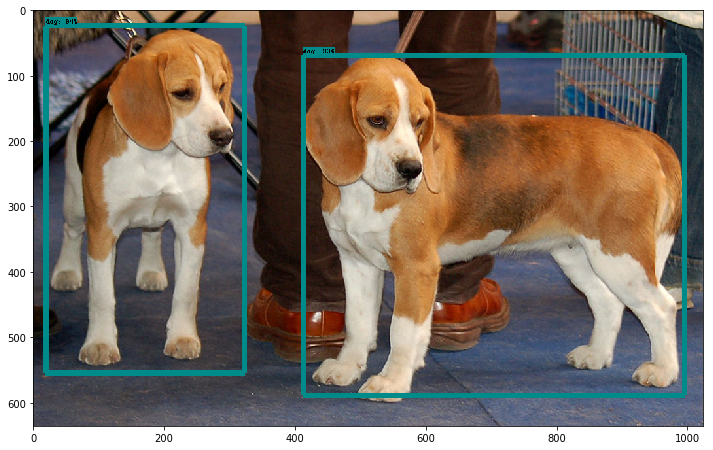

In [18]:
os.chdir(home_path)
detect('test_images/image1.jpg')

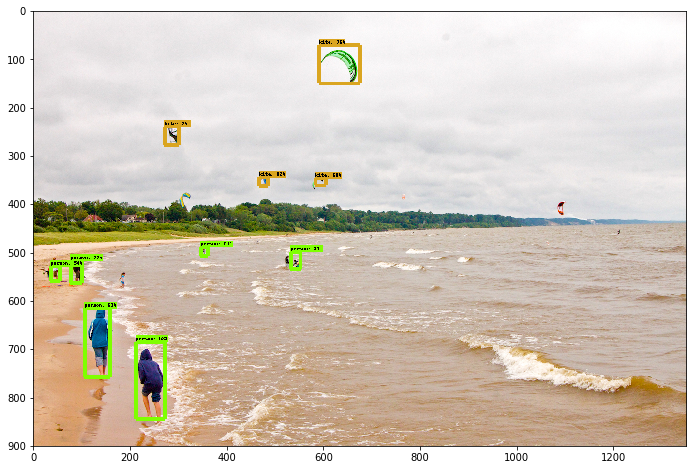

In [19]:
detect('test_images/image2.jpg')

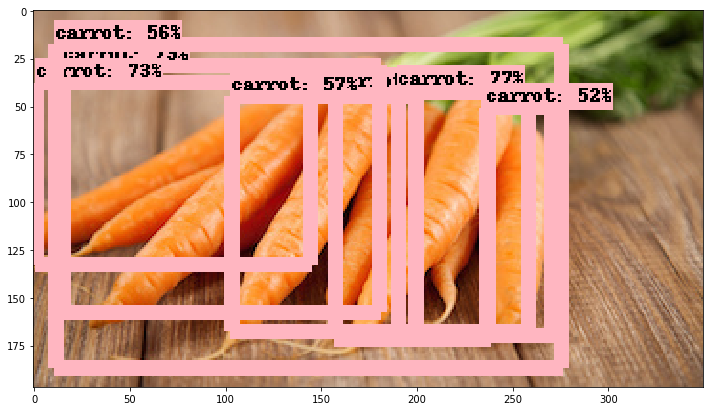

In [16]:
detect('test_images/image3.jpg')

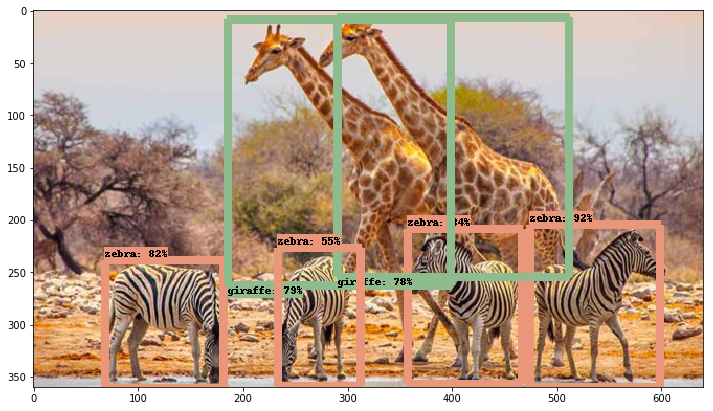

In [17]:
detect('test_images/image5.jpg')

* Now try giving any image from internet, and test how well the model performs

# Conclusion

* As you can see from this TensorFlow tutorial, TensorFlow is a powerful framework that makes working with mathematical expressions and multi-dimensional arrays a breeze—something fundamentally necessary in machine learning. It also abstracts away the complexities of executing the data graphs and scaling.

* Over time, TensorFlow has grown in popularity and is now being used by developers for solving problems using deep learning methods for image recognition, video detection, text processing like sentiment analysis, etc. Like any other library, you may need some time to get used to the concepts that TensorFlow is built on. And, once you do, with the help of documentation and community support, representing problems as data graphs and solving them with TensorFlow can make machine learning at scale a less tedious process.

<a id='0'></a>
# References

* https://www.tensorflow.org/
* https://bytegain.com/blog/getting-started-with-tensorflow-guide
* https://www.kdnuggets.com/2017/12/getting-started-tensorflow.html
* https://www.datacamp.com/community/tutorials/tensorflow-tutorial
* https://github.com/tensorflow/models/tree/master/research/object_detection